In [1]:
import pandas as pd
from google.colab import drive


drive.mount('/content/drive')
!Is "/content/drive/My Drive/Colab Notebooks/IBM Practice"

Mounted at /content/drive
/bin/bash: line 1: Is: command not found


In [2]:
import torch
print(torch.cuda.is_available())


True


In [3]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/IBM Practice/amazon_baby.csv',encoding='gbk')
data

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


In [4]:
target_n = 8000
ratio = target_n / len(data)

counts = (data['rating'].value_counts() * ratio).round().astype(int)

user_review = (
    data.groupby('rating', group_keys=False)
        .apply(lambda x: x.sample(n=counts[x.name], random_state=42))
        .sample(frac=1, random_state=42)
        .reset_index(drop=True)
)

print(user_review['rating'].value_counts())
print(len(user_review))

rating
5    4666
4    1447
3     731
1     662
2     493
Name: count, dtype: int64
7999


/tmp/ipython-input-4098132689.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=counts[x.name], random_state=42))


In [5]:
import re
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel

user_review['review'] = user_review['review'].fillna("")
user_review['review'] = user_review['review'].apply(lambda x:x.lower())
user_review['review'] = user_review['review'].apply(lambda x: re.sub(r"http\S+", "", x))
user_review['review']= user_review['review'].apply(lambda x :re.sub(r"@\w+", "", x))
user_review['review']= user_review['review'].apply(lambda x :re.sub(r"[^\w\s!?]", "", x))
user_review['review']= user_review['review'].apply(lambda x :re.sub(r"\s+", " ", x).strip())
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
user_review['review_token']= user_review['review'].apply(lambda x :tokenizer.tokenize(x))
user_review


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

,name,review,rating,review_token
0,"Regalo Easy Step Walk Thru Gate, White",i thought this was very easy to put together a...,5,"[i, thought, this, was, very, easy, to, put, t..."
1,"BOB Revolution Duallie Weather Shield, Grey",i found a solution to my biggest complaint so ...,4,"[i, found, a, solution, to, my, biggest, compl..."
2,Baby Trend Single Snap N\' Go Stroller,highly recommend this strollerlight weight eas...,5,"[highly, recommend, this, stroll, ##er, ##ligh..."
3,Taggies Plush Colours Spotty Dog,this is my daughters very favortie toy she sle...,5,"[this, is, my, daughters, very, favor, ##tie, ..."
4,Munchkin 3 Piece Silly Sandwich Cutter Set,i got these cookie cutters because i particula...,5,"[i, got, these, cookie, cutter, ##s, because, ..."
...,...,...,...,...
7994,Playtex BPA Free VentAire Wide Bottle Newborn ...,we started using drop ins nursers when our bab...,5,"[we, started, using, drop, ins, nurse, ##rs, w..."
7995,"Luvable Friends 3-Pack Side-Closure, Applique ...",i bought these for my son before he was born a...,5,"[i, bought, these, for, my, son, before, he, w..."
7996,"Bright Starts Bounce-A-Bout Activity Center, N...",our daughter is in the 90th percentile for hei...,2,"[our, daughter, is, in, the, 90, ##th, percent..."
7997,Playtex Baby Drop-Ins Premium Nurser Bottle Fe...,this is a very useful gift for mothers who eit...,5,"[this, is, a, very, useful, gift, for, mothers..."


In [8]:
user_review['review_token_lenght'] = user_review['review_token'].apply(lambda x: len(x))
a = user_review[user_review['review_token_lenght']>512].count()
b = user_review[user_review['review_token_lenght']<=510].count()
c = user_review[user_review['review_token_lenght']==0].count()
user_review['rating'] = user_review['rating'].fillna("")
user_review['rating_processed'] = user_review['rating']-1
cleaned_data = user_review[(user_review['review_token_lenght']>0) & (user_review['review_token_lenght']<=510)]
cleaned_data = cleaned_data[['review', 'rating_processed']]


# user_review.groupby('rating_processed').size()
# 这步是手动调试增加对模型的理解，但是实际build模型的时候，不用这样。可以直接掉模型跑数据
# cleaned_data['token_id'] = cleaned_data['review_token'].apply(lambda x: tokenizer.convert_tokens_to_ids(x))
# cleaned_data['cls_token_sep_id'] = cleaned_data['review_token'].apply(lambda x: tokenizer.build_inputs_with_special_tokens(x))


In [9]:
# token这个里面是可以set参数的，使之返回pytorch类型的tensor数据

encoded = tokenizer(
    cleaned_data['review'].tolist(),
    # is_split_into_words=True,
    padding="max_length",
    truncation=True,
    max_length=512,
    return_attention_mask=True,
    return_tensors="pt"
)
input_ids = encoded["input_ids"]
attention_mask = encoded["attention_mask"]

In [10]:
input_ids

tensor([[  101,  1045,  2245,  ...,     0,     0,     0],
        [  101,  1045,  2179,  ...,     0,     0,     0],
        [  101,  3811, 16755,  ...,     0,     0,     0],
        ...,
        [  101,  2256,  2684,  ...,     0,     0,     0],
        [  101,  2023,  2003,  ...,     0,     0,     0],
        [  101,  1045,  2293,  ...,     0,     0,     0]])

In [11]:
attention_mask

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [12]:

# view the data skew
cleaned_data.groupby('rating_processed').size()


,0
rating_processed,
0,654
1,490
2,718
3,1422
4,4606


In [13]:
# 给label也要变成pytorch tensor的形式，保持一致。模型才能训练
labels = torch.tensor(cleaned_data['rating_processed'].values)
labels

tensor([4, 3, 4,  ..., 1, 4, 4])

In [ ]:
print(labels.dtype)
print(labels.min(), labels.max())
print(labels.unique())
print(labels.shape)


torch.int64
tensor(0) tensor(4)
tensor([0, 1, 2, 3, 4])
torch.Size([19752])


In [14]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# input_ids, attention_mask, labels 都是 tensor
train_inputs, test_inputs, train_masks, test_masks, train_labels, test_labels = train_test_split(
    input_ids,
    attention_mask,
    labels,
    test_size=0.2,   # 20% 作为测试集
    random_state=42
)

# 训练集：
# TensorDataset作用是把train_inputs, train_masks, train_labels作为一个整体输入模型，不然需要手动写代码切片，比较麻烦
train_dataset = TensorDataset(train_inputs, train_masks, train_labels)

# 测试集 Dataset
test_dataset = TensorDataset(test_inputs, test_masks, test_labels)



batch_size = 8

# 训练 DataLoader
train_dataloader = DataLoader(
    train_dataset,
    sampler=RandomSampler(train_dataset),  # 打乱顺序，为了提高模型泛化，降低顺序噪音
    batch_size=batch_size
)

# 测试 DataLoader
test_dataloader = DataLoader(
    test_dataset,
    sampler=SequentialSampler(test_dataset),  # 按顺序取
    batch_size=batch_size
)


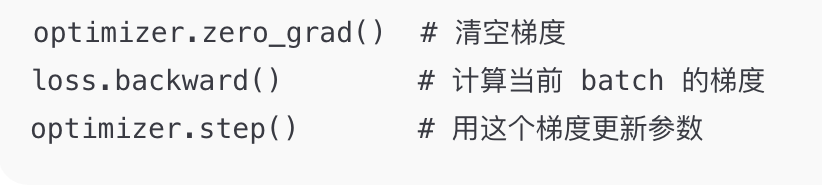

In [15]:
from transformers import BertForSequenceClassification
from torch.optim import AdamW
from sklearn.metrics import accuracy_score


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=5
)
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

model.train()
for epochs in range(3):
  for batch in train_dataloader:
    input,attention_mask_label,label = [t.to(device) for t in batch]
    optimizer.zero_grad()
    outputs = model(
        input_ids=input,
        attention_mask=attention_mask_label,
        labels=label
    )
    loss = outputs.loss
    loss.backward()
    optimizer.step()

model.eval()
predeict_label,test_label = [],[]
# 这个步骤测试集合，需要设置no_grad
with torch.no_grad():
   for batch in test_dataloader:
        b_input_ids, b_attention_mask, b_labels = [x.to(device) for x in batch]
        logits = model(b_input_ids, attention_mask=b_attention_mask).logits
        print('*********',logits,'*********')
        print('-----',torch.argmax(logits, dim=1).cpu().numpy(),'------')
        print('@@@@@@',b_labels.cpu().numpy(),'@@@@@')
        predeict_label.extend(torch.argmax(logits, dim=1).cpu().numpy())
        test_label.extend(b_labels.cpu().numpy())

print("Test Accuracy:", accuracy_score(test_label, predeict_label))

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


********* tensor([[-2.2578, -2.7951, -2.2349,  1.1518,  5.3631],
        [-0.6913,  0.6468,  1.6963,  0.3089, -1.7710],
        [-2.6681, -3.0923, -1.9696,  2.0189,  4.9344],
        [-3.3517, -2.9683, -0.9754,  2.9958,  3.6001],
        [-2.5314, -2.9004, -1.7050,  1.6602,  4.7291],
        [-2.5924, -2.8483, -1.5367,  1.8032,  4.3266],
        [-2.0963, -2.9887, -2.0895,  1.3692,  5.0366],
        [-2.1098, -2.8240, -2.1307,  1.1466,  5.0484]], device='cuda:0') *********
----- [4 2 4 4 4 4 4 4] ------
@@@@@@ [4 1 4 3 1 3 4 4] @@@@@
********* tensor([[-3.1014, -2.4069, -0.3771,  3.6304,  1.4723],
        [-1.7365, -2.5684, -2.3173,  0.6714,  5.2416],
        [-2.5757, -0.5157,  2.5026,  1.8274, -1.1864],
        [-3.1719, -2.1562,  0.3805,  3.7339,  0.7879],
        [ 3.1640,  2.1667, -0.4357, -2.2251, -2.3274],
        [ 0.0975,  1.4936,  1.9490, -0.3084, -2.6081],
        [-2.3110, -2.9662, -2.2487,  1.4151,  5.2622],
        [-0.4456,  1.5549,  2.0507,  0.1759, -2.4901]], device='c

Confusion Matrix:
 [[ 79  36  14   2   4]
 [ 23  53  17   6   2]
 [  8  45  59  29   8]
 [  2   6  39 117 108]
 [  6   2  15 149 749]]


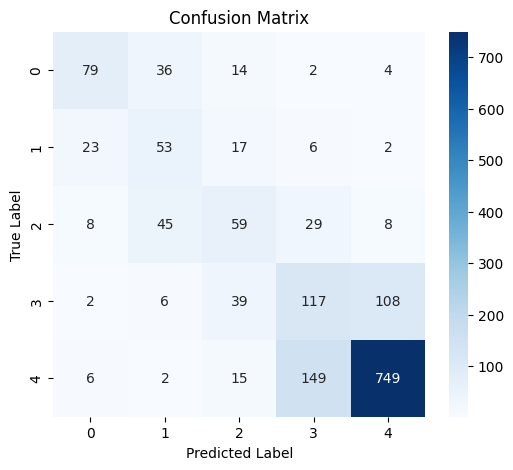

              precision    recall  f1-score   support

           0      0.669     0.585     0.625       135
           1      0.373     0.525     0.436       101
           2      0.410     0.396     0.403       149
           3      0.386     0.430     0.407       272
           4      0.860     0.813     0.836       921

    accuracy                          0.670      1578
   macro avg      0.540     0.550     0.541      1578
weighted avg      0.688     0.670     0.677      1578



In [16]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 5 类的真实标签和预测标签
y_true = test_label
y_pred = predeict_label

# 生成混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 打印混淆矩阵
print("Confusion Matrix:\n", cm)

# 可视化
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 可选：生成更详细的分类报告
print(classification_report(y_true, y_pred, digits=3))


## 如何调试模型
# 分层抽样 + class-weight loss方法


In [17]:
cleaned_data.groupby('rating_processed').size()


,0
rating_processed,
0,654
1,490
2,718
3,1422
4,4606


In [19]:
from torch.nn import CrossEntropyLoss
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Suppose class_counts = [number of samples for 1-star, 2-star, ..., 5-star]
class_counts = [654, 490, 718, 1422, 4606]

# Compute class weights inversely proportional to class frequency
class_weights = 1.0 / torch.tensor(class_counts, dtype=torch.float)
class_weights = class_weights / class_weights.sum()

# Use weighted loss
loss_fn = CrossEntropyLoss(weight=class_weights)



class_weights = class_weights.to(device)
loss_fn = CrossEntropyLoss(weight=class_weights)

In [20]:
train_losses = []
val_losses = []


model.train()
for epoch in range(3):
    epoch_loss = 0

    for batch in train_dataloader:
        input_ids, attention_mask, labels = [t.to(device) for t in batch]

        optimizer.zero_grad()

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        logits = outputs.logits
        loss = loss_fn(logits, labels)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / len(train_dataloader)
    train_losses.append(avg_epoch_loss)

    print(f"Epoch {epoch+1}, Train Loss: {avg_epoch_loss:.4f}")


model.eval()
val_epoch_loss = 0

with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = [t.to(device) for t in batch]

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        logits = outputs.logits
        loss = loss_fn(logits, labels)
        val_epoch_loss += loss.item()

avg_val_loss = val_epoch_loss / len(test_dataloader)
val_losses.append(avg_val_loss)

print(f"Epoch {epoch+1}, Val Loss: {avg_val_loss:.4f}")


Epoch 1, Train Loss: 0.5652
Epoch 2, Train Loss: 0.3770
Epoch 3, Train Loss: 0.2403
Epoch 3, Val Loss: 1.5607


In [22]:
model.eval()
predeict_label,test_label = [],[]
# 这个步骤测试集合，需要设置no_grad
with torch.no_grad():
   for batch in test_dataloader:
        b_input_ids, b_attention_mask, b_labels = [x.to(device) for x in batch]
        logits = model(b_input_ids, attention_mask=b_attention_mask).logits
        print('*********',logits,'*********')
        print('-----',torch.argmax(logits, dim=1).cpu().numpy(),'------')
        print('@@@@@@',b_labels.cpu().numpy(),'@@@@@')
        predeict_label.extend(torch.argmax(logits, dim=1).cpu().numpy())
        test_label.extend(b_labels.cpu().numpy())

print("Test Accuracy:", accuracy_score(test_label, predeict_label))

********* tensor([[-1.3083, -2.5016, -2.6431,  0.3595,  6.4399],
        [-2.1027, -0.4143,  2.9012,  0.3592, -1.0973],
        [-1.3148, -2.9878, -2.2625,  0.5291,  6.0518],
        [-3.2468, -3.9253, -1.1604,  4.3618,  3.4020],
        [-0.6439, -2.1083, -1.2860, -0.5579,  5.0347],
        [-2.7395, -3.6704, -0.8818,  3.2545,  3.6702],
        [-0.6087, -2.7572, -2.5388,  0.2003,  5.7922],
        [-0.6028, -2.4893, -2.3941, -0.2174,  5.8616]], device='cuda:0') *********
----- [4 2 4 3 4 4 4 4] ------
@@@@@@ [4 1 4 3 1 3 4 4] @@@@@
********* tensor([[-2.8182, -3.3933, -0.9953,  4.6760,  2.0025],
        [-0.1969, -2.3942, -2.5672, -0.5052,  5.7405],
        [-3.4356, -0.8532,  4.8670,  1.8509, -2.3206],
        [-2.8055, -2.4161,  0.6680,  5.4589, -1.2748],
        [ 4.6709,  2.2708, -2.6676, -2.8609, -1.9449],
        [-2.2323,  2.1631,  4.6057, -1.1712, -3.0151],
        [-1.1552, -2.6907, -2.5866,  0.3405,  6.2654],
        [-1.9861,  3.4218,  3.9062, -1.3819, -2.7485]], device='c

Confusion Matrix:
 [[ 69  44  13   3   6]
 [ 12  54  26   7   2]
 [  6  52  64  21   6]
 [  2   4  45 122  99]
 [  7   5  19 112 778]]


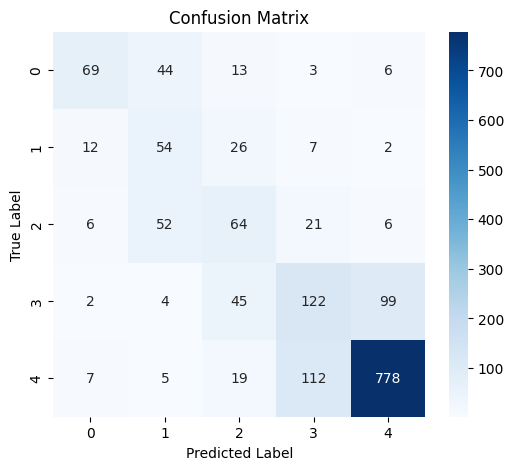

              precision    recall  f1-score   support

           0      0.719     0.511     0.597       135
           1      0.340     0.535     0.415       101
           2      0.383     0.430     0.405       149
           3      0.460     0.449     0.454       272
           4      0.873     0.845     0.859       921

    accuracy                          0.689      1578
   macro avg      0.555     0.554     0.546      1578
weighted avg      0.708     0.689     0.695      1578



In [23]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 5 类的真实标签和预测标签
y_true = test_label
y_pred = predeict_label

# 生成混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 打印混淆矩阵
print("Confusion Matrix:\n", cm)

# 可视化
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 可选：生成更详细的分类报告
print(classification_report(y_true, y_pred, digits=3))


In [29]:
import torch
import torch.nn.functional as F
from torch import nn
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup
from sklearn.metrics import classification_report


# -----------------------------
# 1️⃣ Class weight
# -----------------------------
# 样本数
counts = torch.tensor([654, 490, 718, 1422, 4606], dtype=torch.float)
total = counts.sum()
num_classes = len(counts)
weights = total / (num_classes * counts)
weights = weights.to(device)

loss_fn = nn.CrossEntropyLoss(weight=weights)

# -----------------------------
# 2️⃣ Optimizer + Scheduler
# -----------------------------
num_epochs = 3
optimizer = AdamW(model.parameters(), lr=3e-5)

total_steps = len(train_dataloader) * num_epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1*total_steps),
    num_training_steps=total_steps
)

# -----------------------------
# 3️⃣ Training loop
# -----------------------------
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0

    for batch in train_dataloader:
        input_ids, attention_mask, labels = [t.to(device) for t in batch]

        optimizer.zero_grad()

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        logits = outputs.logits
        loss = loss_fn(logits, labels)

        loss.backward()
        optimizer.step()
        scheduler.step()  # 更新学习率
        optimizer.zero_grad()

        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / len(train_dataloader)
    train_losses.append(avg_epoch_loss)
    print(f"Epoch {epoch+1}, Train Loss: {avg_epoch_loss:.4f}")

    # -----------------------------
    # 4️⃣ Validation + probability adjustment
    # -----------------------------
    model.eval()
    val_epoch_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in test_dataloader:
            input_ids, attention_mask, labels = [t.to(device) for t in batch]

            logits = model(input_ids=input_ids, attention_mask=attention_mask).logits
            loss = loss_fn(logits, labels)
            val_epoch_loss += loss.item()

            # softmax 转概率
            probs = F.softmax(logits, dim=1)

            # 少数类概率放大 (0~3类)
            adjustment = torch.tensor([1.2, 1.2, 1.2, 1.2, 1.0], device=device)
            probs_adjusted = probs * adjustment
            probs_adjusted = probs_adjusted / probs_adjusted.sum(dim=1, keepdim=True)

            preds = probs_adjusted.argmax(dim=1)
            all_preds.append(preds.cpu())
            all_labels.append(labels.cpu())

    avg_val_loss = val_epoch_loss / len(test_dataloader)
    val_losses.append(avg_val_loss)

    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)

    print(f"Epoch {epoch+1}, Val Loss: {avg_val_loss:.4f}")
    print(classification_report(all_labels, all_preds))


Epoch 1, Train Loss: 0.2324
Epoch 1, Val Loss: 1.5348
              precision    recall  f1-score   support

           0       0.56      0.57      0.57       135
           1       0.33      0.59      0.43       101
           2       0.35      0.34      0.35       149
           3       0.41      0.57      0.48       272
           4       0.90      0.72      0.80       921

    accuracy                           0.64      1578
   macro avg       0.51      0.56      0.52      1578
weighted avg       0.70      0.64      0.66      1578

Epoch 2, Train Loss: 0.1378
Epoch 2, Val Loss: 1.9269
              precision    recall  f1-score   support

           0       0.68      0.50      0.58       135
           1       0.34      0.65      0.45       101
           2       0.45      0.33      0.38       149
           3       0.47      0.51      0.49       272
           4       0.87      0.83      0.85       921

    accuracy                           0.69      1578
   macro avg       0.56

Confusion Matrix:
 [[ 73  39  11   8   4]
 [ 13  47  31   6   4]
 [  8  37  66  33   5]
 [  4   7  26 143  92]
 [  9   5  10 137 760]]


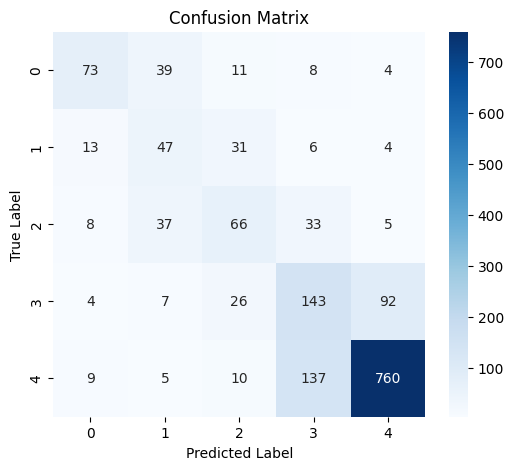

              precision    recall  f1-score   support

           0      0.682     0.541     0.603       135
           1      0.348     0.465     0.398       101
           2      0.458     0.443     0.451       149
           3      0.437     0.526     0.477       272
           4      0.879     0.825     0.851       921

    accuracy                          0.690      1578
   macro avg      0.561     0.560     0.556      1578
weighted avg      0.712     0.690     0.699      1578



In [31]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 5 类的真实标签和预测标签
y_true = all_labels
y_pred = all_preds

# 生成混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 打印混淆矩阵
print("Confusion Matrix:\n", cm)

# 可视化
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 可选：生成更详细的分类报告
print(classification_report(y_true, y_pred, digits=3))
